## 导入所有必需的库 Import all required libraries

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

## 读取训练和测试数据 Load Train and Test data

In [24]:
# create the training & test sets, skipping the header row with [1:]
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_train = train.ix[:,1:].values.astype('float32') # 加载所有的值，并转换成float
y_train = train.ix[:,0].values.astype('int32') # 加载标签列
X_test = test.values.astype('float32') # 加载测试集

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


这是一个多类分类程序

This is a multiclass classification problem.

让从数据集我们看一下3个图片

Lets look at 3 images from data set with their labels.

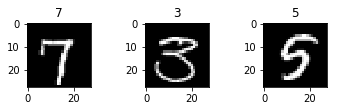

In [27]:
# Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [28]:
#1个维度扩展为1个颜色通道的灰度
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [29]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

## 预处理数字图片 Preprocessing the digit images

### 特征标准化   Feature Standardization

这是重要的预处理步骤。用于零均值和方差

It is important preprocessing step. It is used to centre the data around zero mean and unit variance.

In [30]:
# 标准化值=x-均值/标准差
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

## 对标签进行独热编码 One Hot encoding of labels.

一个独热向量是一个1个1和其他全是0的一维数组.
A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. 

在这个案例里数字几，向量里的第几维度就是1
In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

举个例子，3就是0001000000
For example, 3 would be [0,0,0,1,0,0,0,0,0,0].

In [31]:
# 独热编码处理 to_categorical是将类向量（整数）转换为二进制类矩阵。
from keras.utils.np_utils import to_categorical
print(y_train.shape)
print(y_train[:2])
y_train= to_categorical(y_train)
print(y_train.shape)
print(y_train[:2])
num_classes = y_train.shape[1]
num_classes

(42000,)
[1 0]
(42000, 10)
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


10

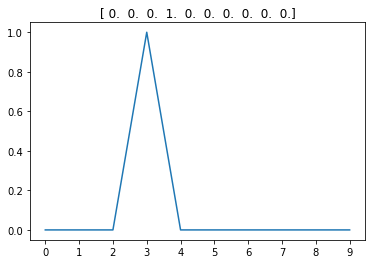

In [32]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10));

##  设计神经网络体系结构 Designing Neural Network Architecture

In [33]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

### 线性模型 Linear Model

In [34]:
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

让我们用Keras Sequential层创建一个简单的模型
Lets create a simple model from Keras Sequential layer.

1. Lambda层执行简单的算术运算，如求和、平均值、取幂等。在模型的第一层中，我们必须以（行，列，颜色通道）格式定义数据的输入尺寸。 （在theano色彩通道首先）
1. Lambda layer performs simple arithmetic operations like sum, average, exponentiation etc.In 1st layer of the model we have to define input dimensions of our data in (rows,columns,colour channel) format. (In theano colour channel comes first).
2. Flatten将输入转换为1D阵列。
2. Flatten will transform input into 1D array.
3. Dense 是完全连通层,  这意味着前层中的所有神经元都将连接到完全连通层中的所有神经元。
3. Dense is fully connected layer that means all neurons in previous layers will be connected to all neurons in fully connected layer. In the last layer we have to specify output dimensions/classes of the model. Here it's 10, since we have to output 10 different digit labels.

In [35]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


## Compile network

在网络准备好进行训练之前，我们必须确保添加以下内容
Before making network ready for training we have to make sure to add below things:

1. 损失函数： 测试网络的好坏程度
1. A loss function: to measure how good the network is
2. 优化器：当它看到更多的数据并减少损失值时，更新网络
2. An optimizer: to update network as it sees more data and reduce loss value
3. 指标：监视网络的性能
3. Metrics: to monitor performance of network

In [36]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [37]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [39]:
history=model.fit_generator(batches, batches.n, nb_epoch=1, 
                    validation_data=val_batches, nb_val_samples=val_batches.n)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 37800, validation_data=<keras.pre..., epochs=1, validation_steps=4200)`
  


Epoch 1/1
37800/37800 [==============================] - 79s - loss: 0.2402 - acc: 0.9341 - val_loss: 0.3241 - val_acc: 0.9164


In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

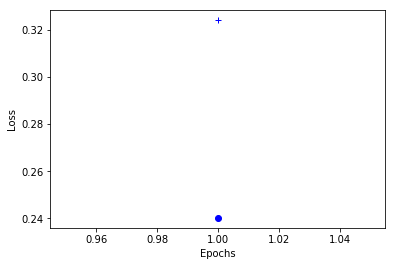

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

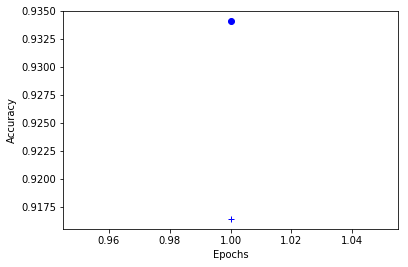

In [42]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [43]:
model.optimizer.lr=0.01
gen = image.ImageDataGenerator()
batches = gen.flow(X_train, y_train, batch_size=64)
history=model.fit_generator(batches, batches.n, nb_epoch=1)

Epoch 1/1
   58/37800 [..............................] - ETA: 107s - loss: 0.2161 - acc: 0.9386

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., 37800, epochs=1)`
  after removing the cwd from sys.path.


37800/37800 [==============================] - 82s - loss: 0.2159 - acc: 0.9417    


In [44]:
predictions = model.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)